<a href="https://colab.research.google.com/github/ukablahblah/421Paper/blob/main/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Device set to use cpu
[*********************100%***********************]  1 of 1 completed



Analyzing AAPL...


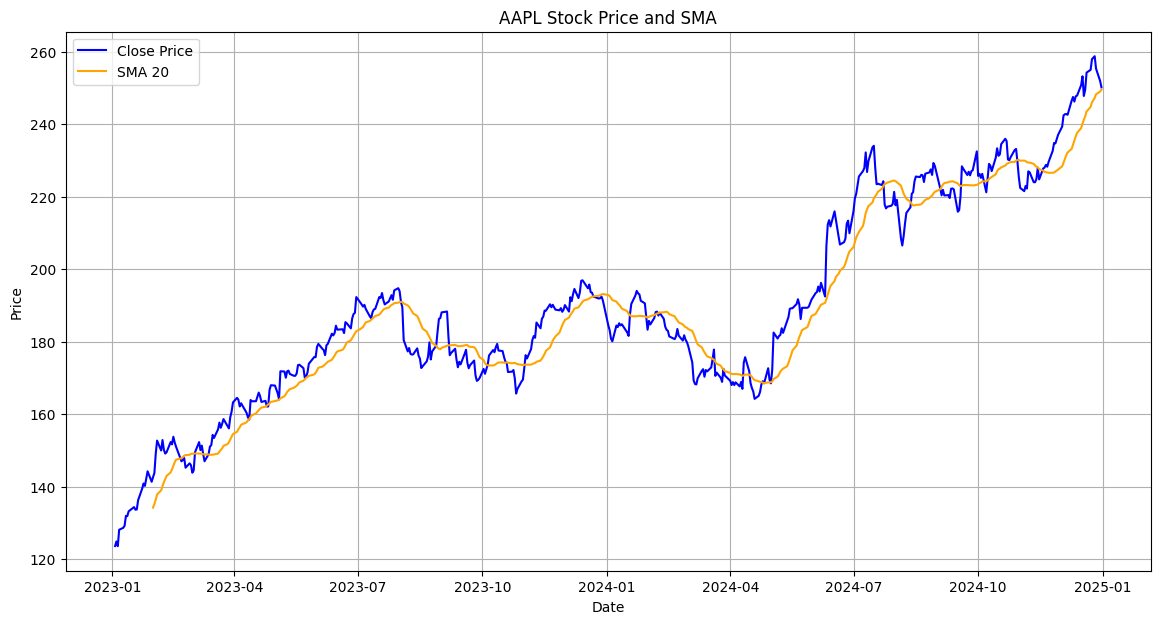

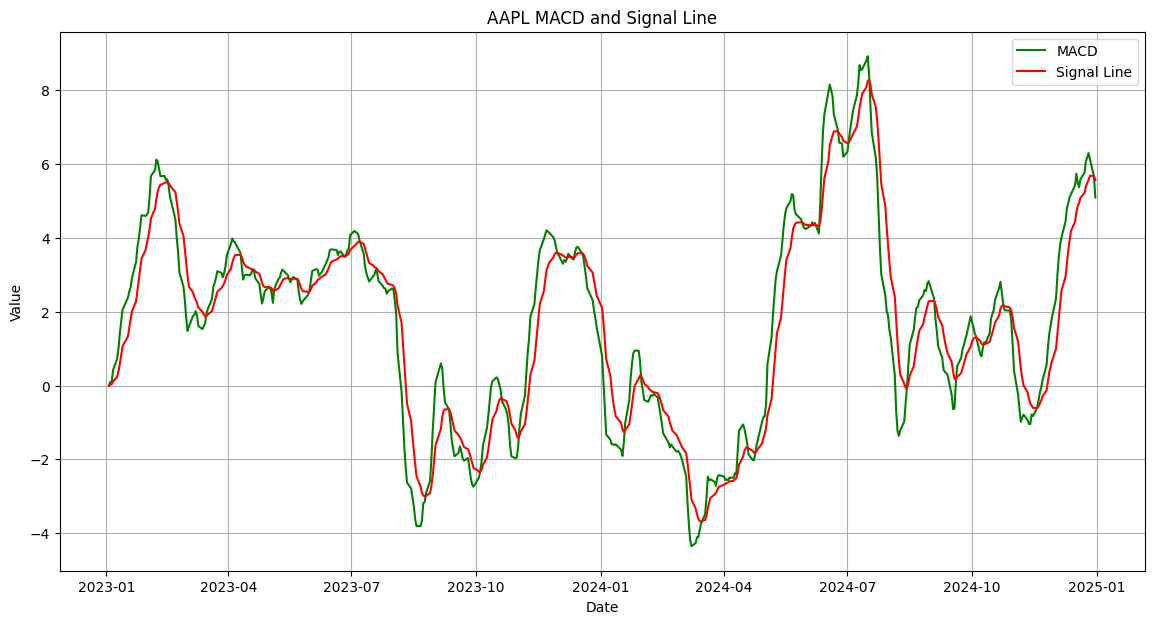

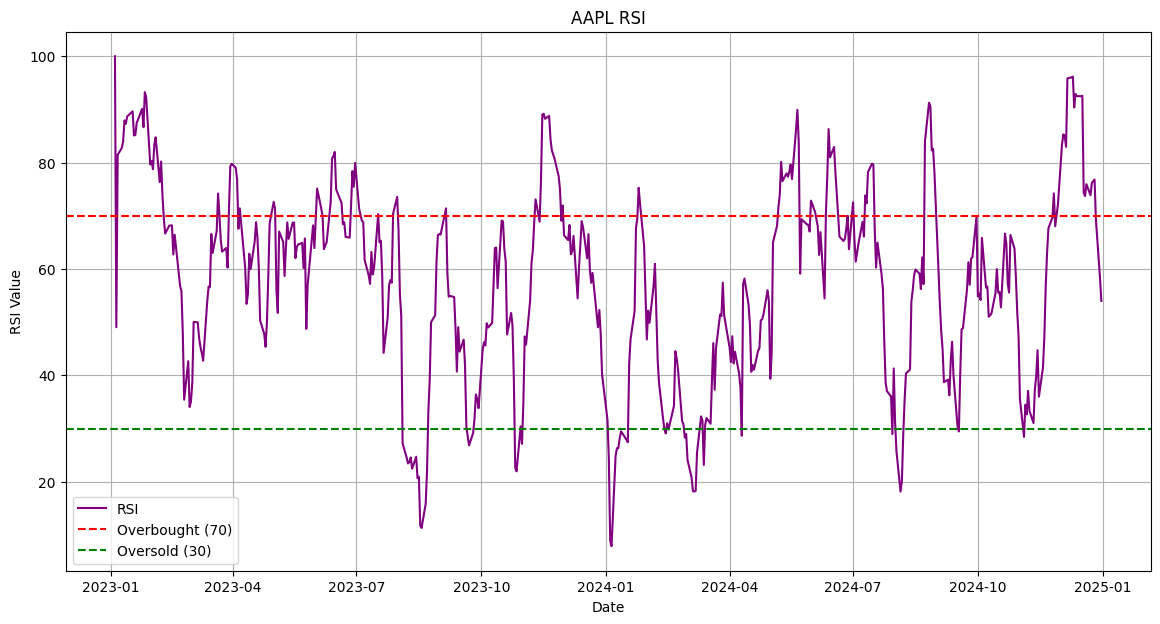

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for AAPL:
The stock's RSI is 53.98, the MACD is 5.10, and the Signal Line is 5.56. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing MSFT...


[*********************100%***********************]  1 of 1 completed


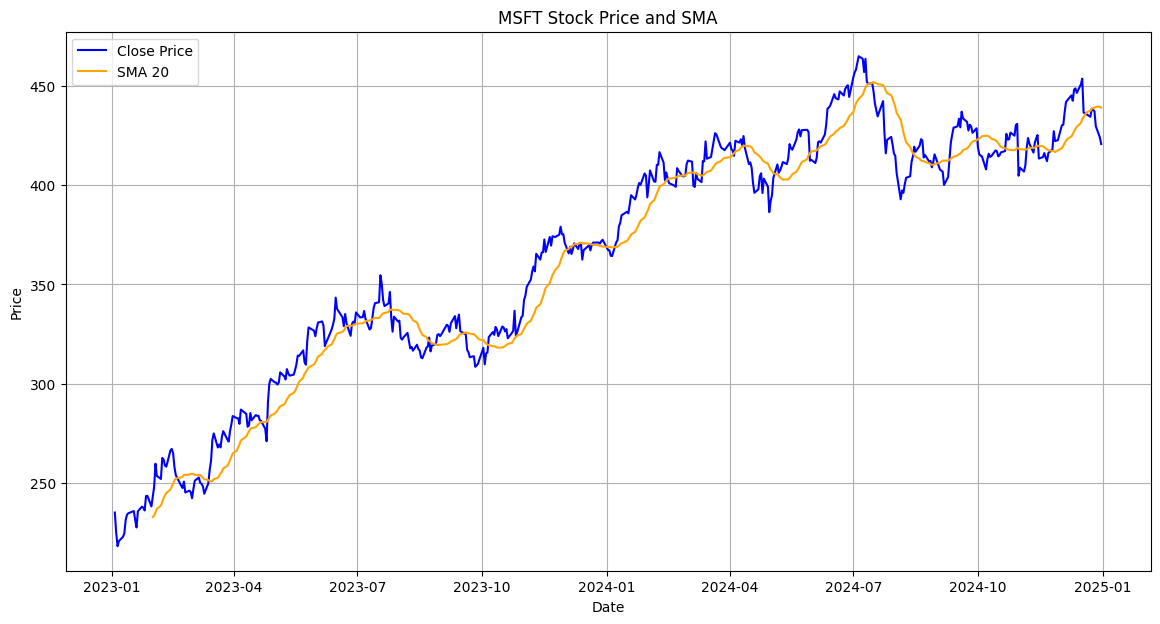

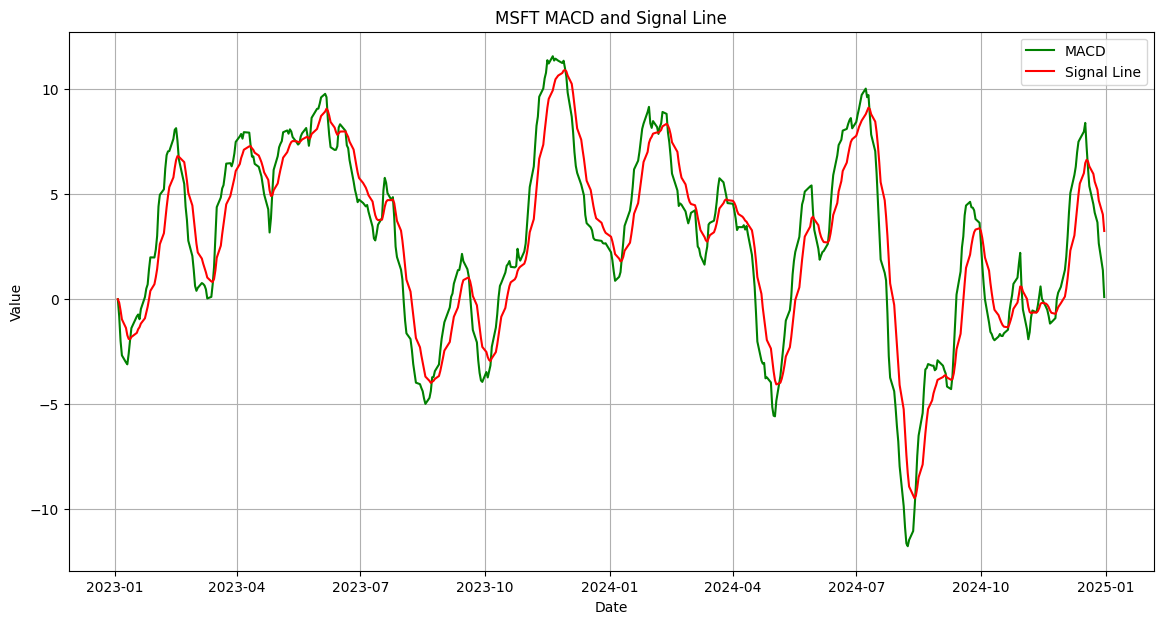

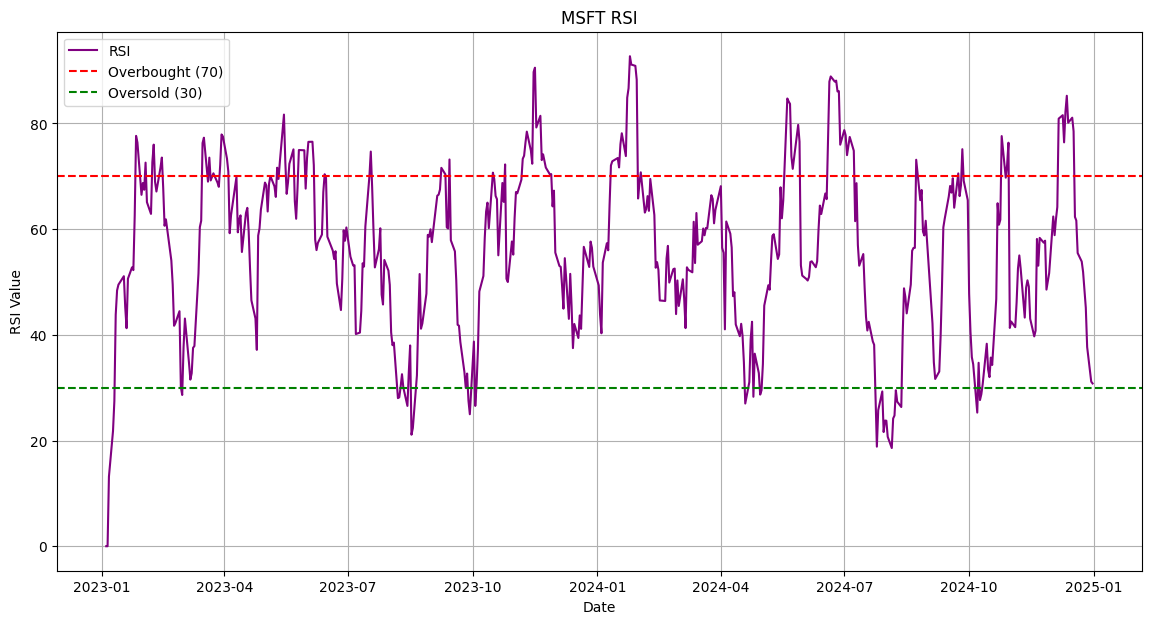

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for MSFT:
The stock's RSI is 30.79, the MACD is 0.10, and the Signal Line is 3.25. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing GOOGL...


[*********************100%***********************]  1 of 1 completed


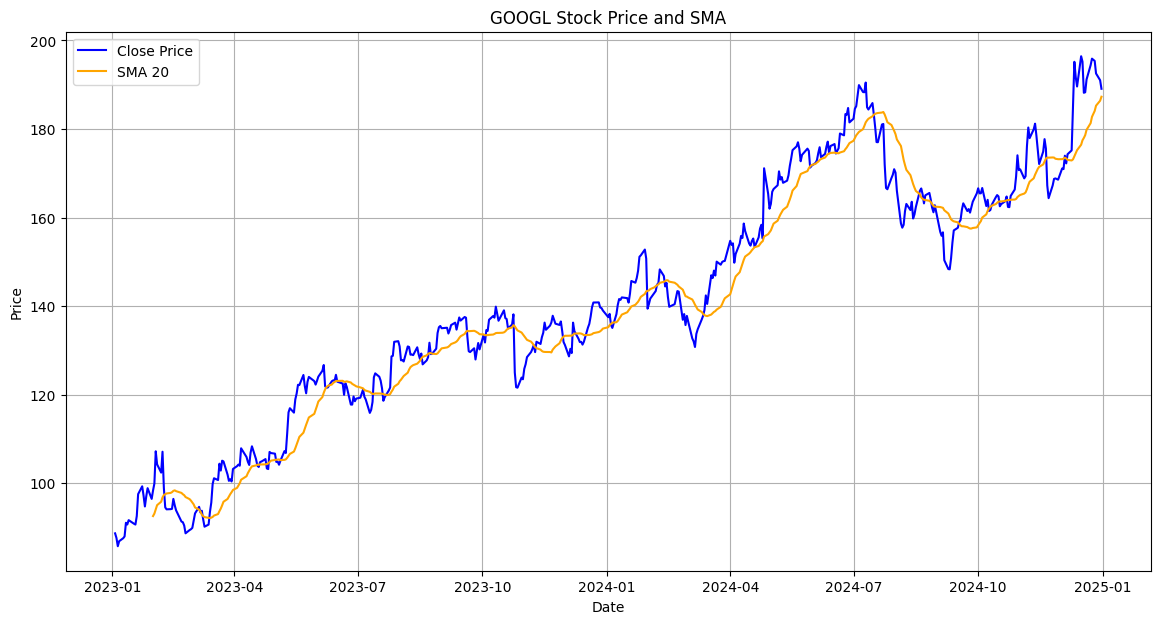

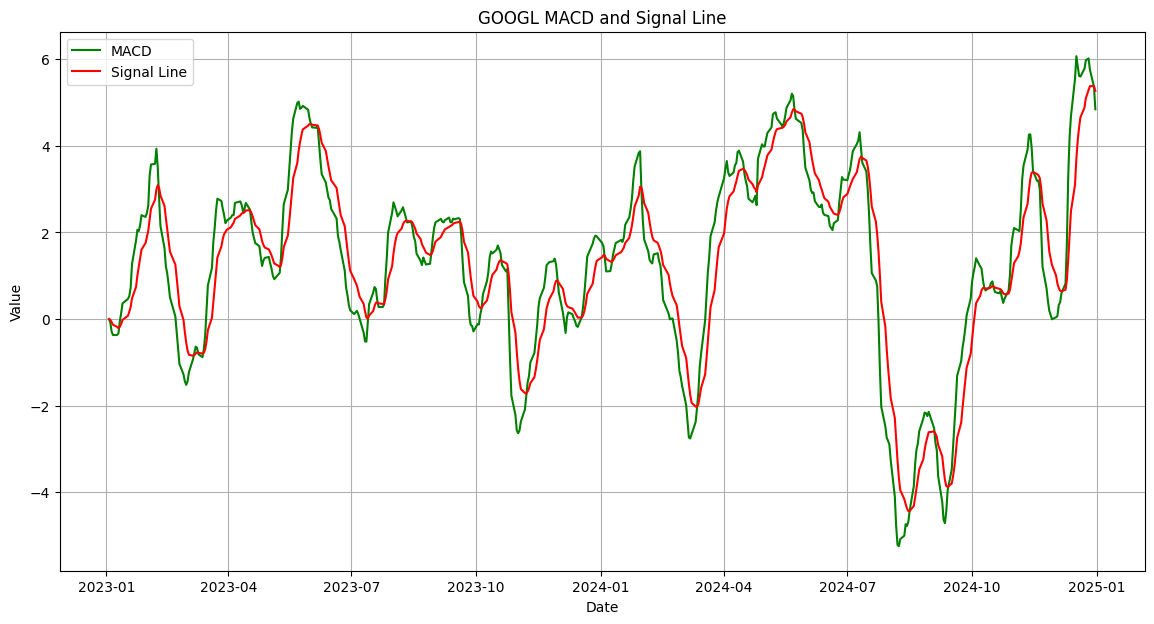

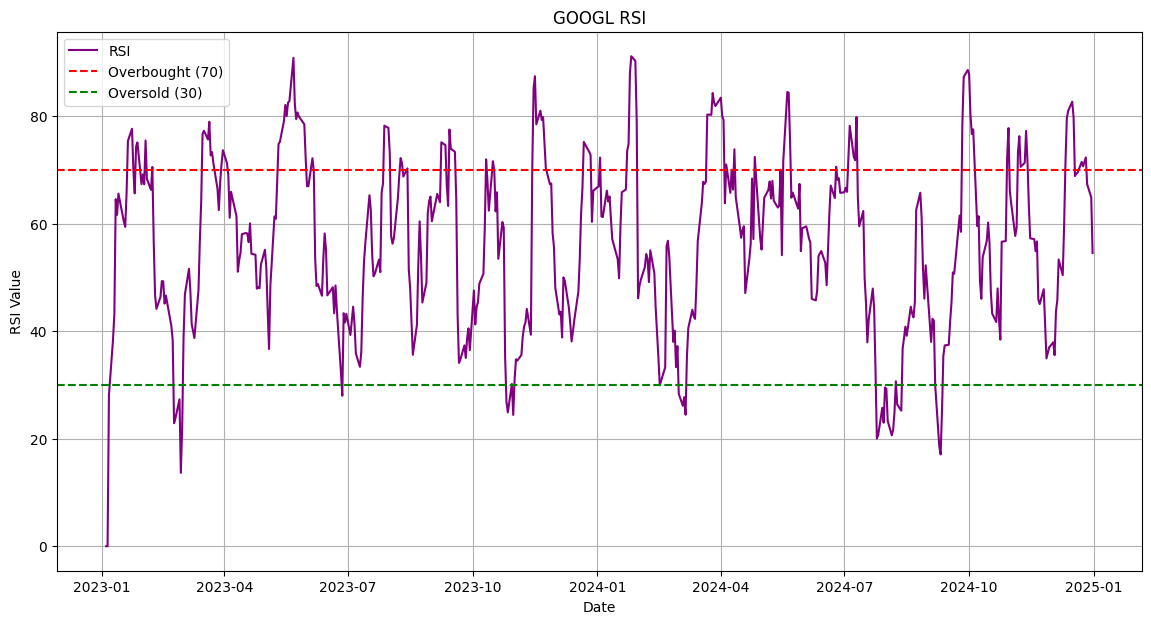

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for GOOGL:
The stock's RSI is 54.55, the MACD is 4.84, and the Signal Line is 5.27. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing AMZN...


[*********************100%***********************]  1 of 1 completed


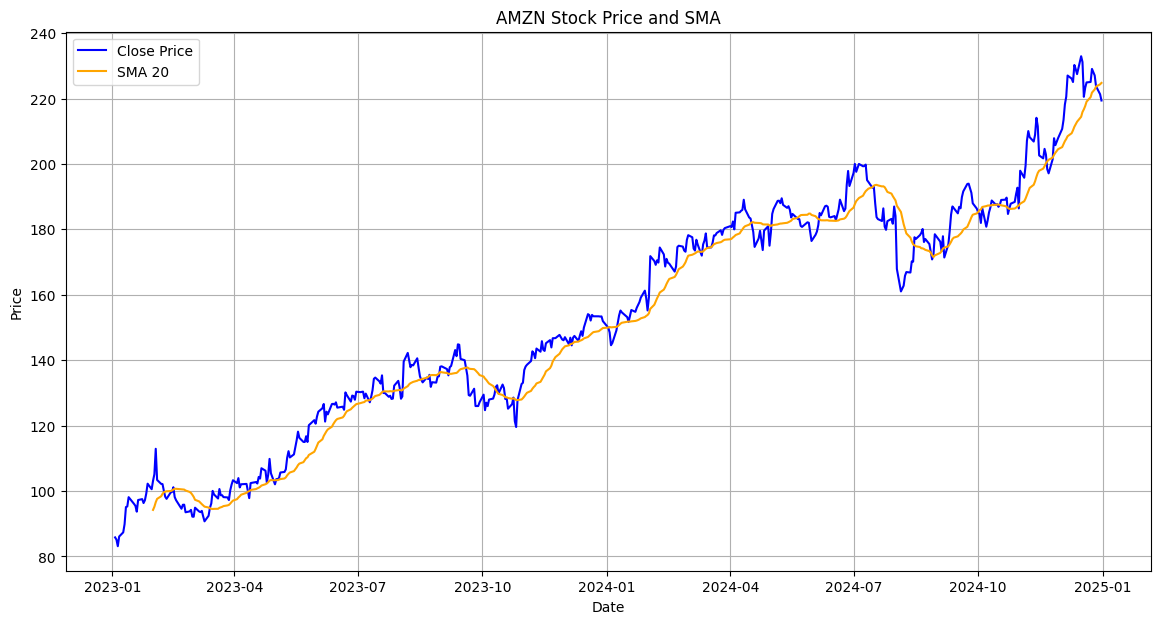

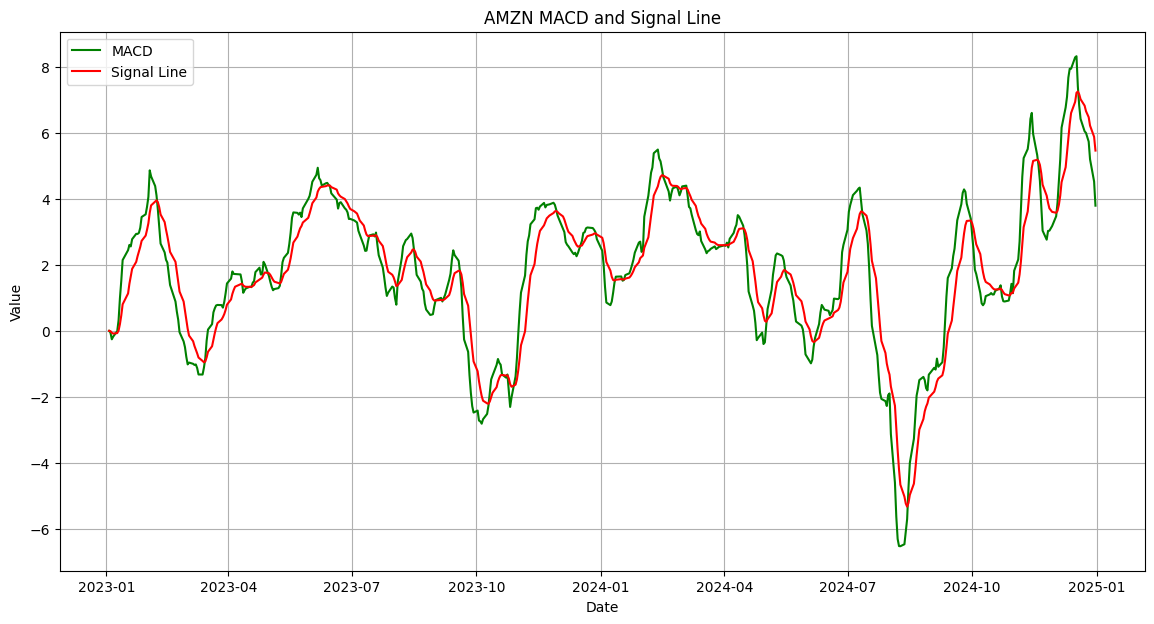

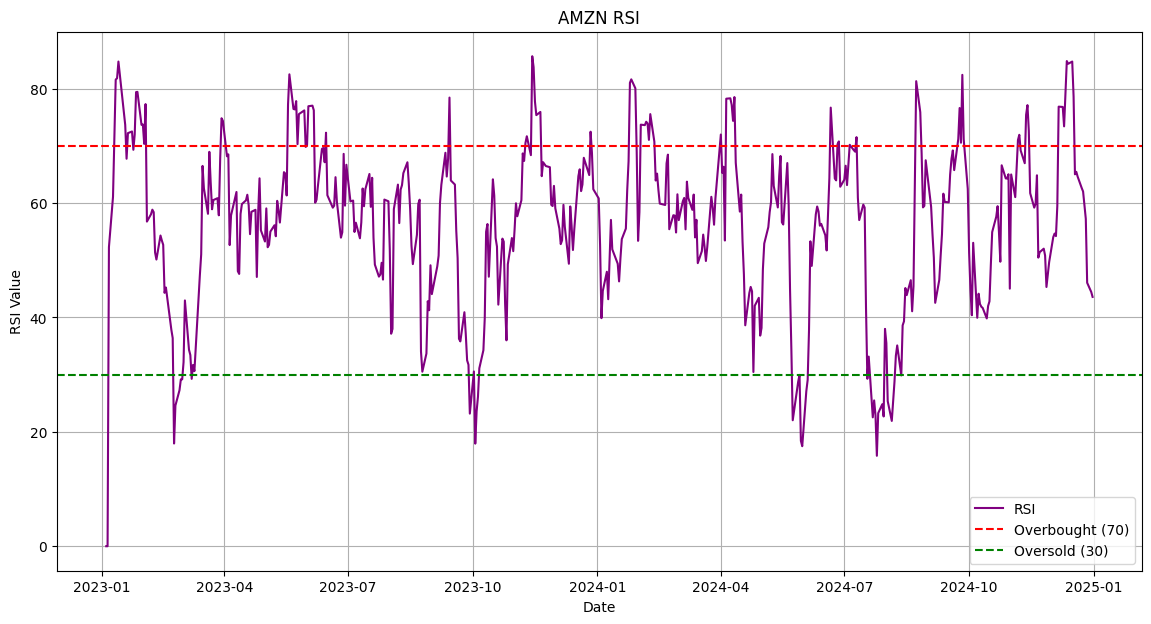

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for AMZN:
The stock's RSI is 43.59, the MACD is 3.80, and the Signal Line is 5.47. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing NVDA...


[*********************100%***********************]  1 of 1 completed


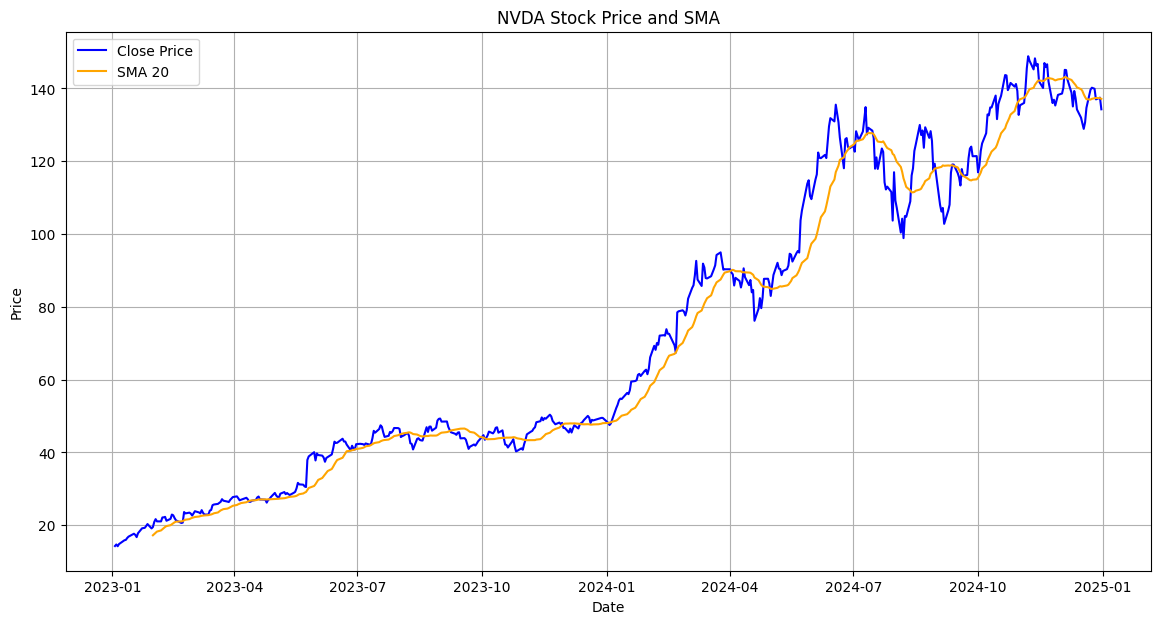

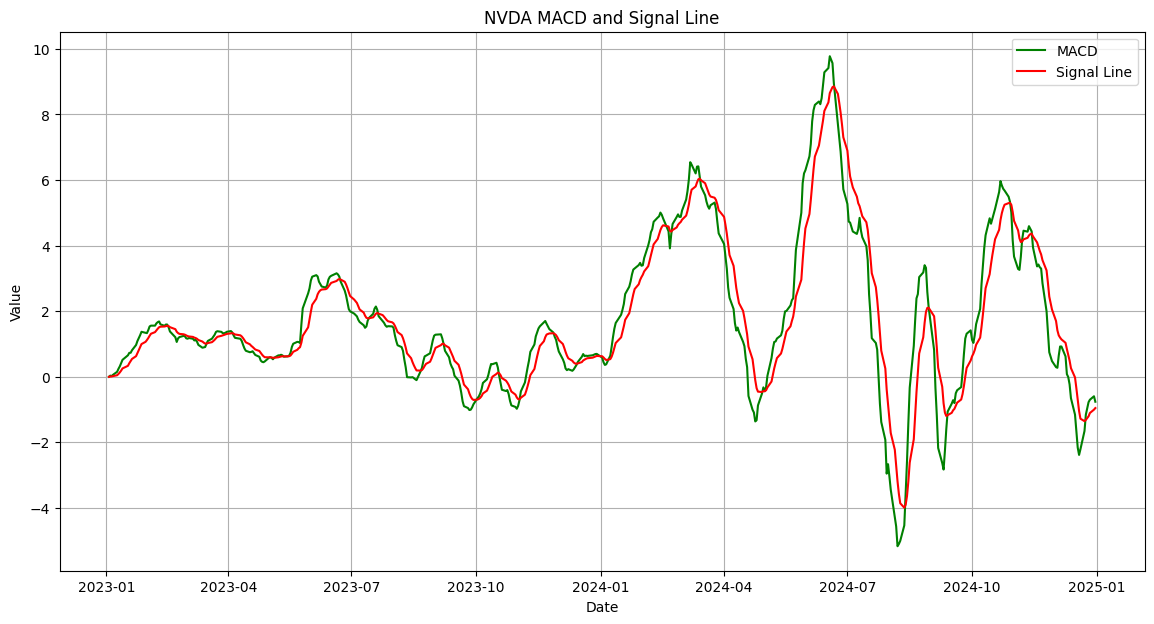

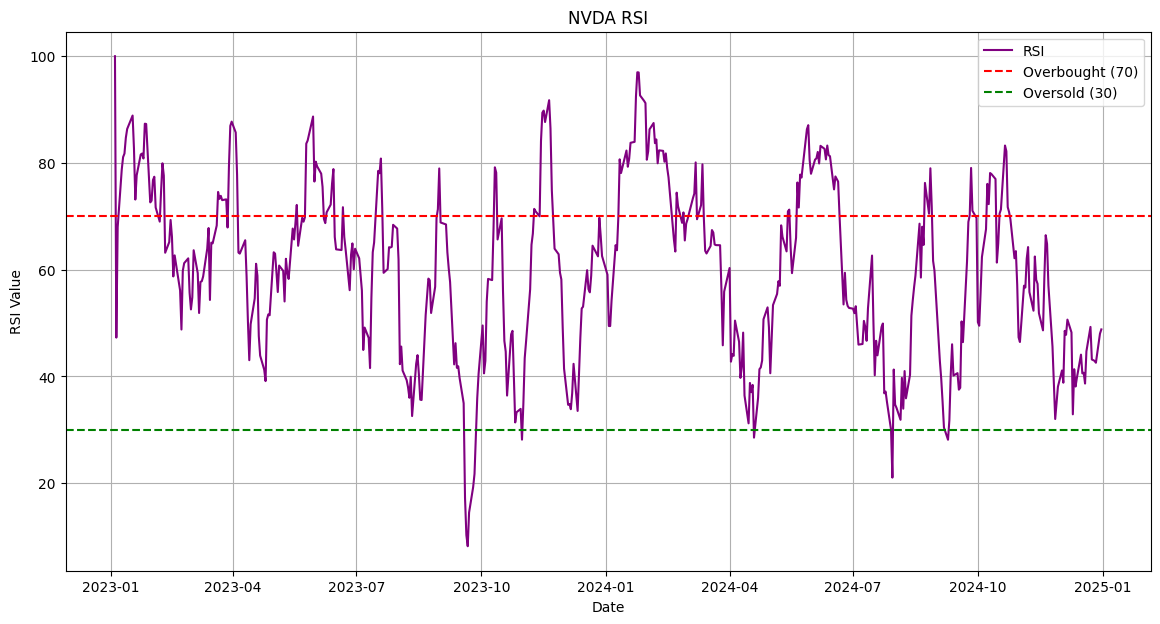

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
[*********************100%***********************]  1 of 1 completed


Generated Insights for NVDA:
The stock's RSI is 48.81, the MACD is -0.76, and the Signal Line is -0.95. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing TSLA...


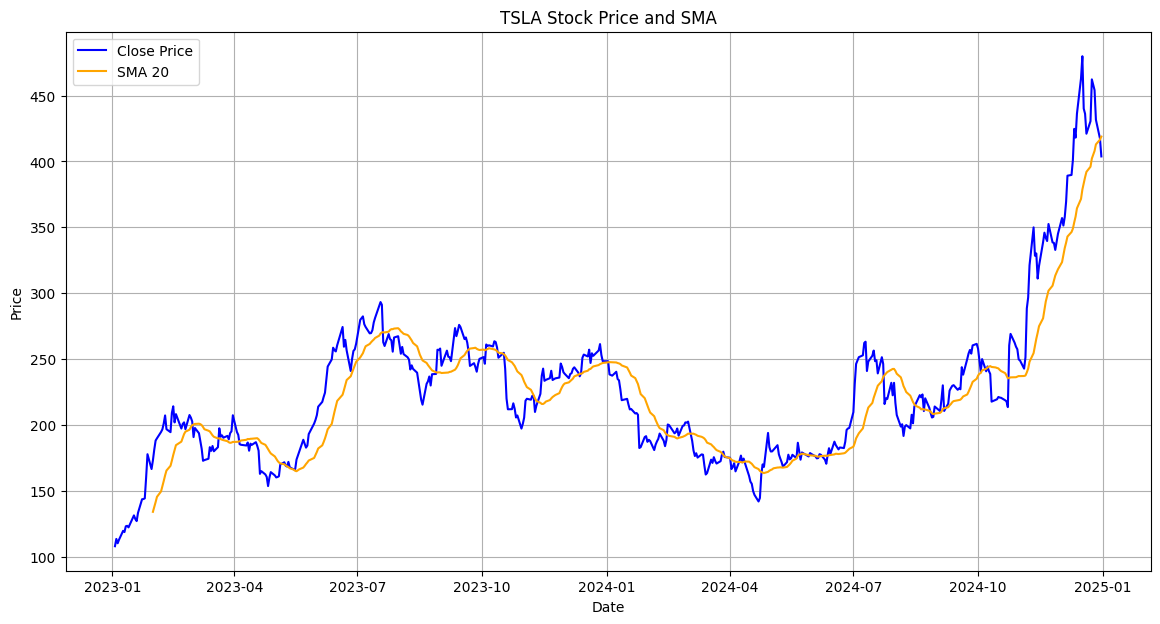

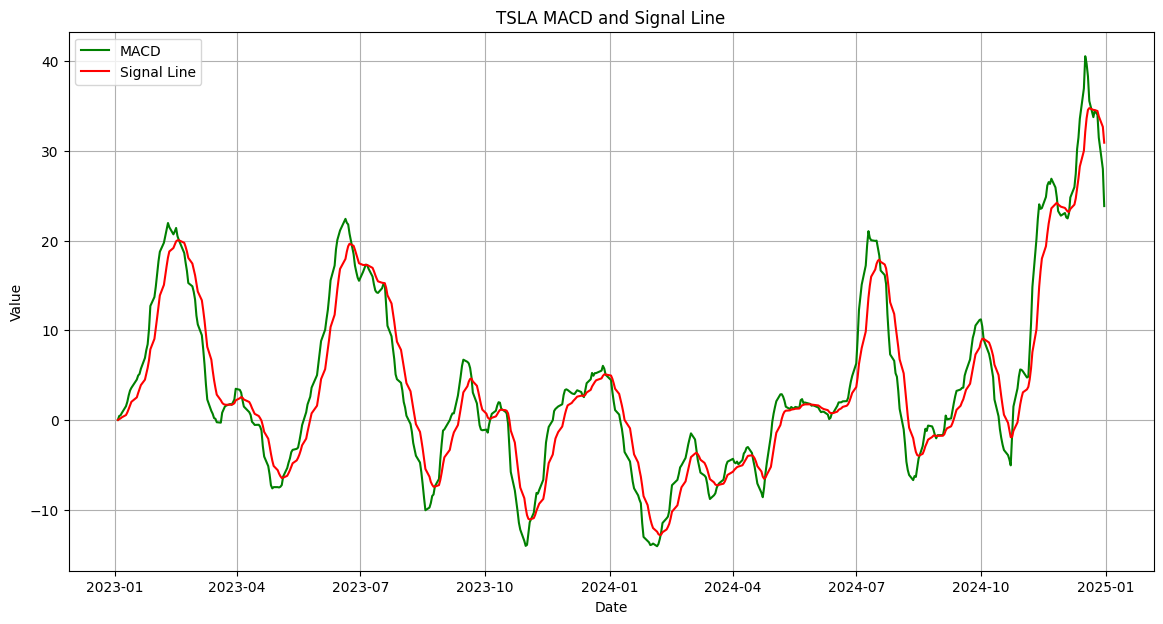

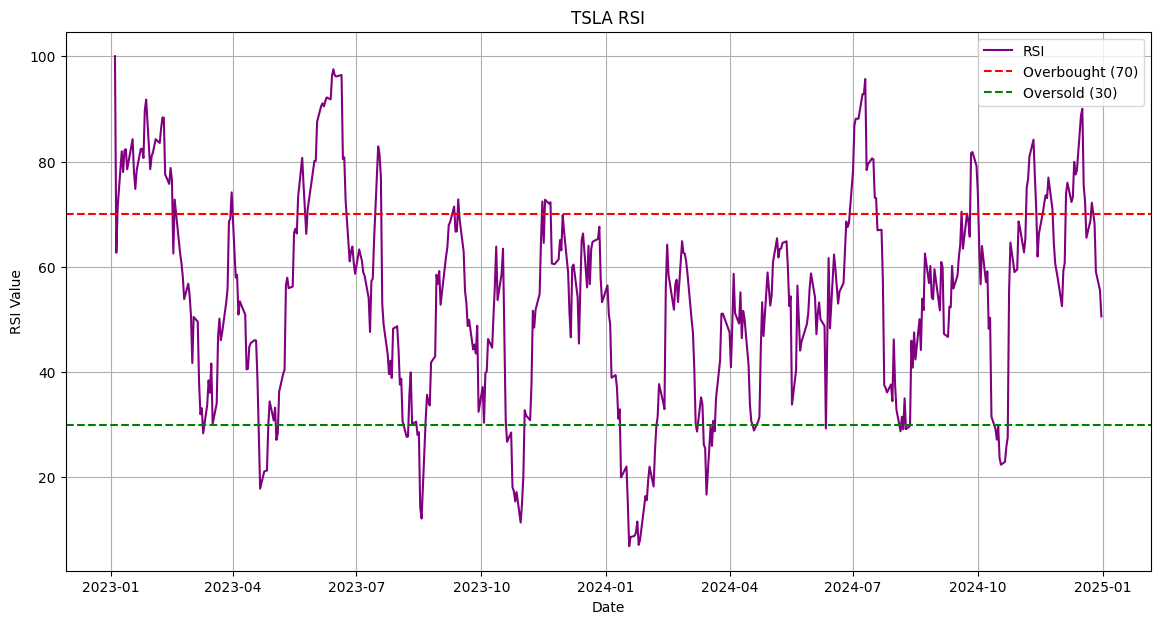

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for TSLA:
The stock's RSI is 50.57, the MACD is 23.84, and the Signal Line is 30.90. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing META...


[*********************100%***********************]  1 of 1 completed


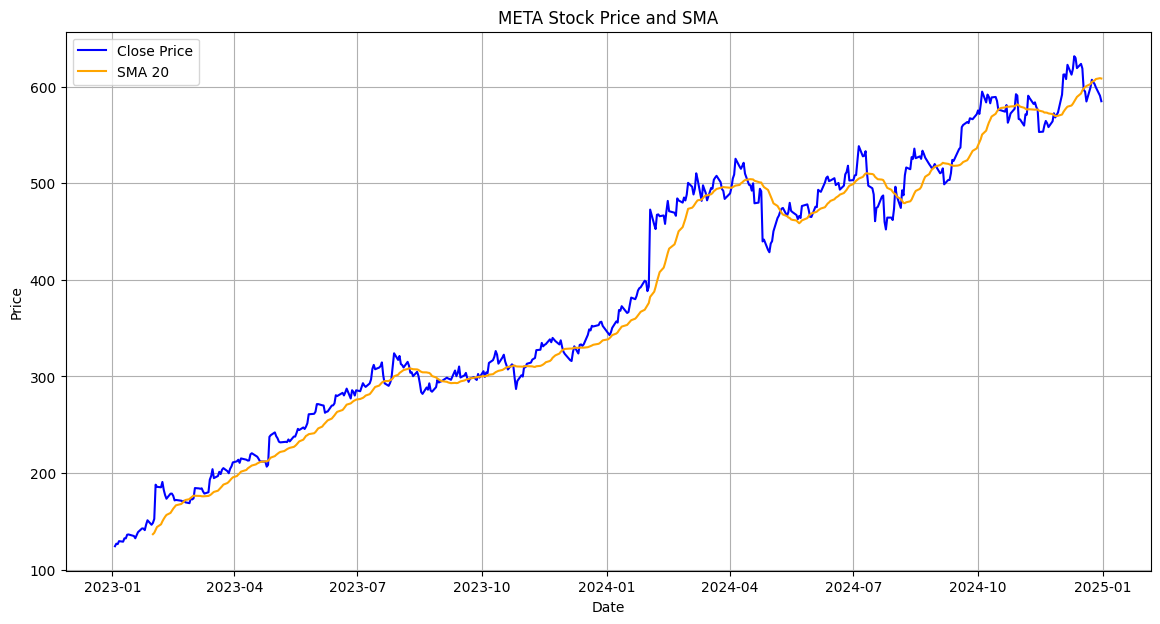

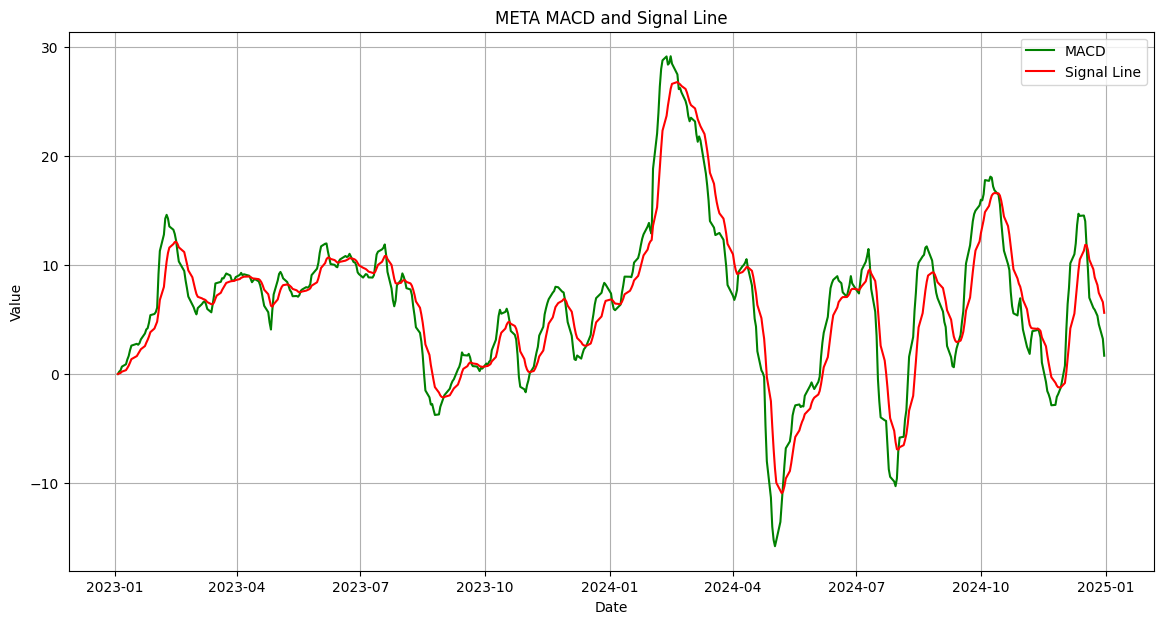

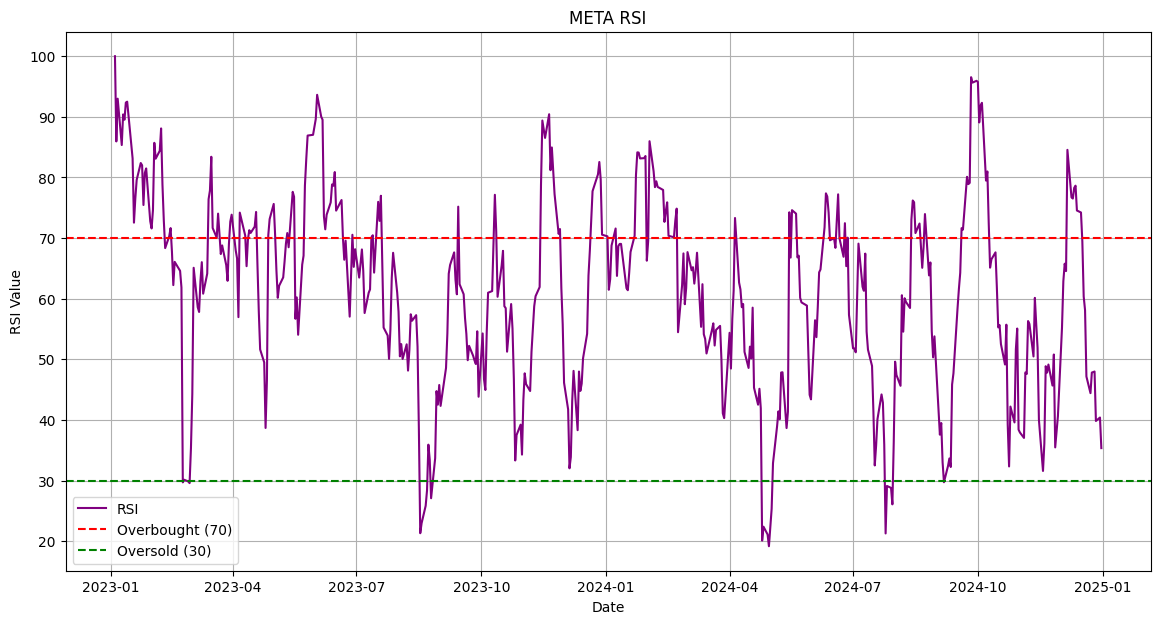

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for META:
The stock's RSI is 35.36, the MACD is 1.67, and the Signal Line is 5.61. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing PEP...


[*********************100%***********************]  1 of 1 completed


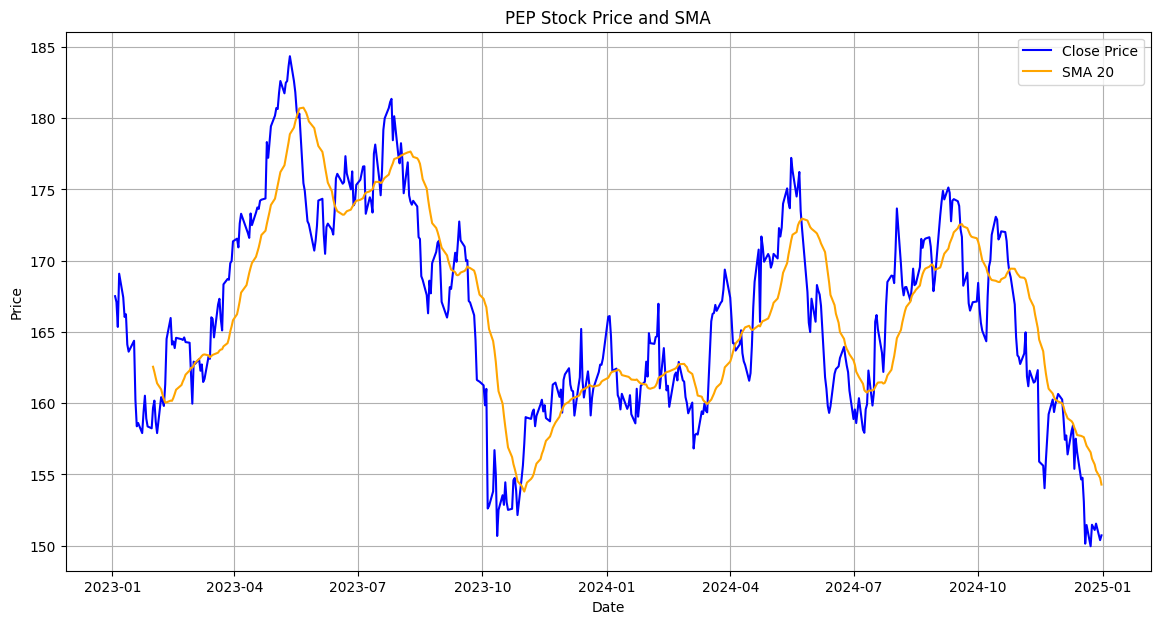

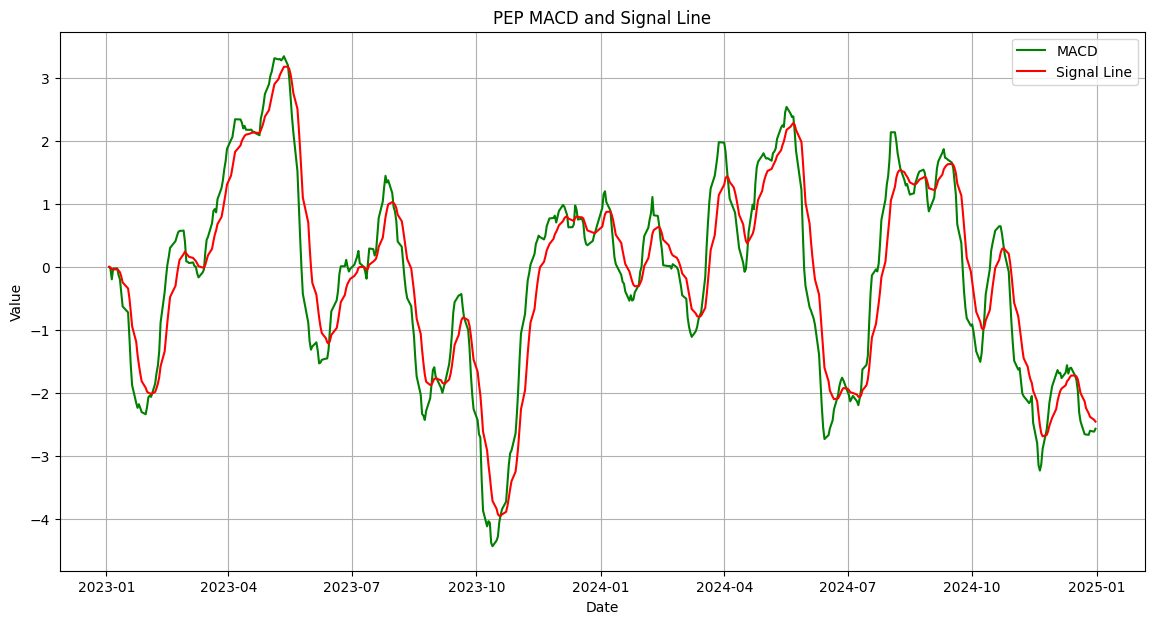

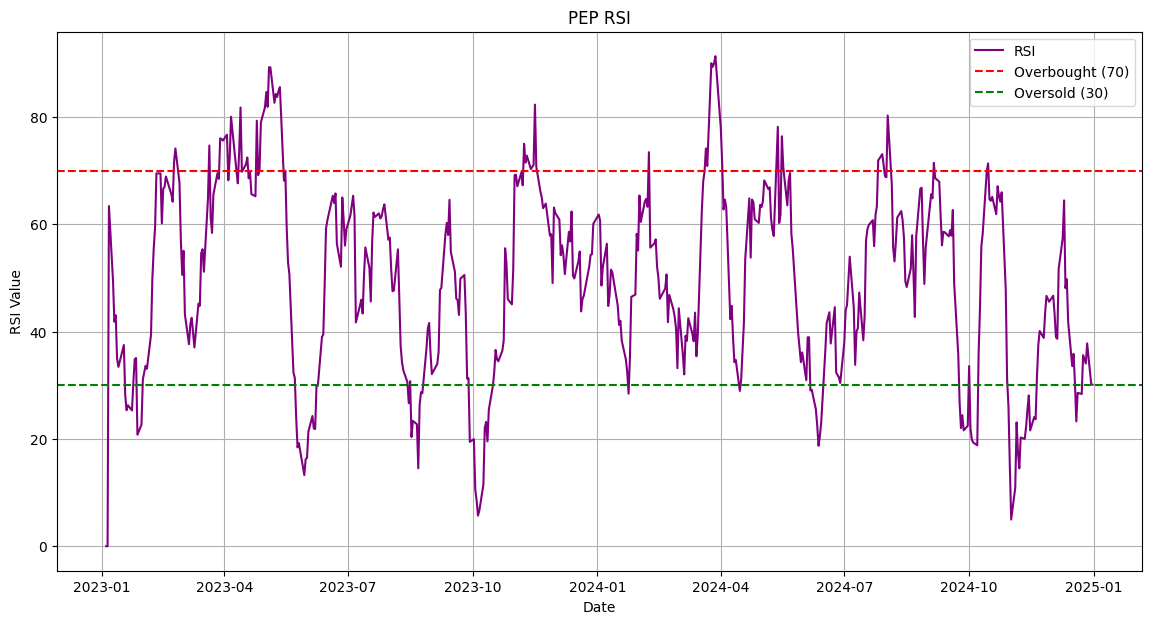

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for PEP:
The stock's RSI is 30.09, the MACD is -2.57, and the Signal Line is -2.46. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing AVGO...


[*********************100%***********************]  1 of 1 completed


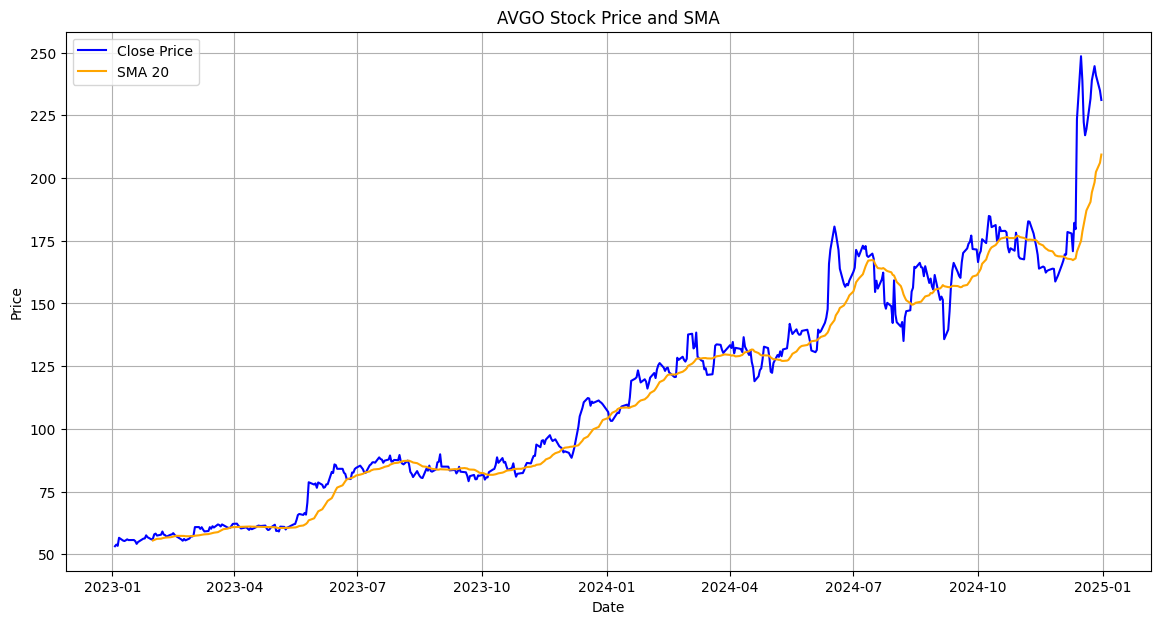

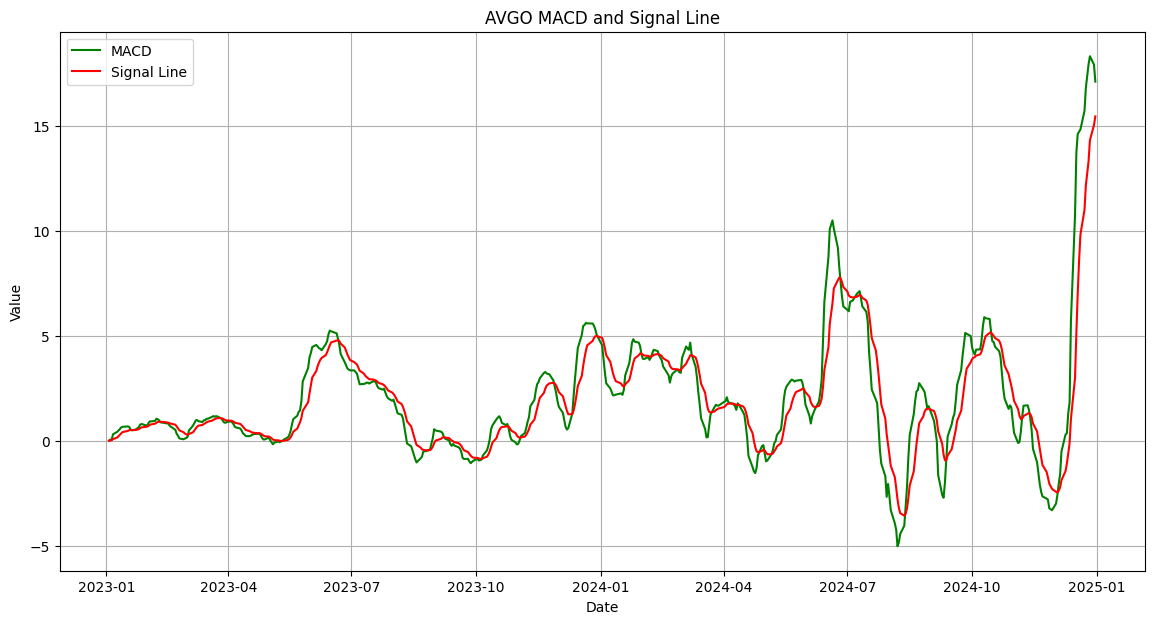

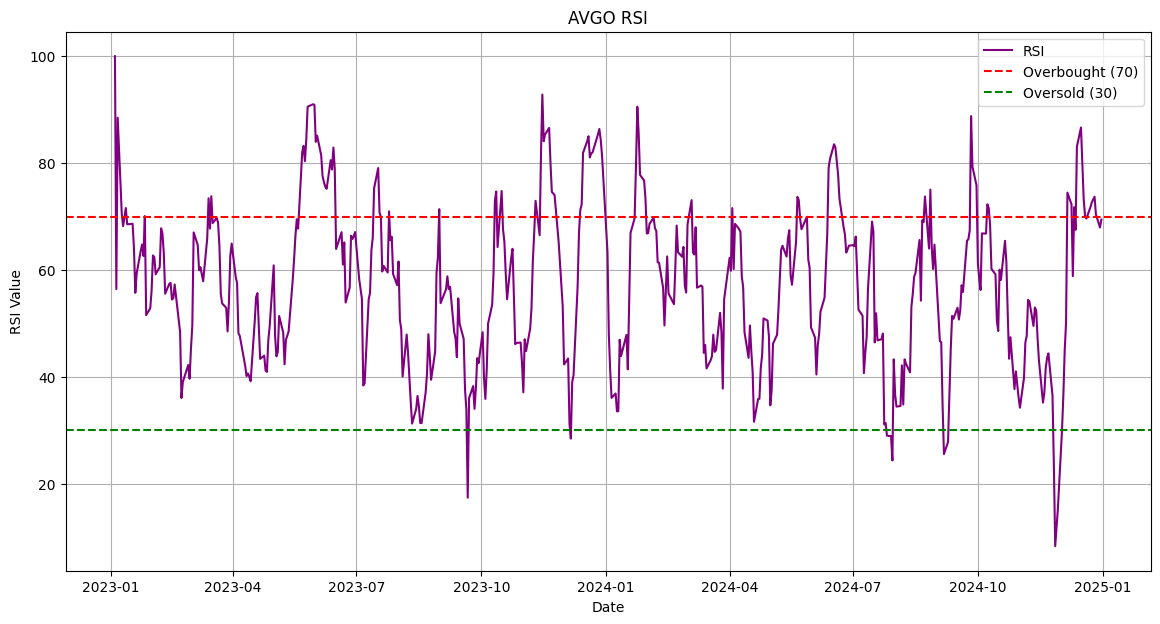

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for AVGO:
The stock's RSI is 69.41, the MACD is 17.09, and the Signal Line is 15.44. Based on these indicators, provide a detailed financial analysis and recommendation.

Analyzing COST...


[*********************100%***********************]  1 of 1 completed


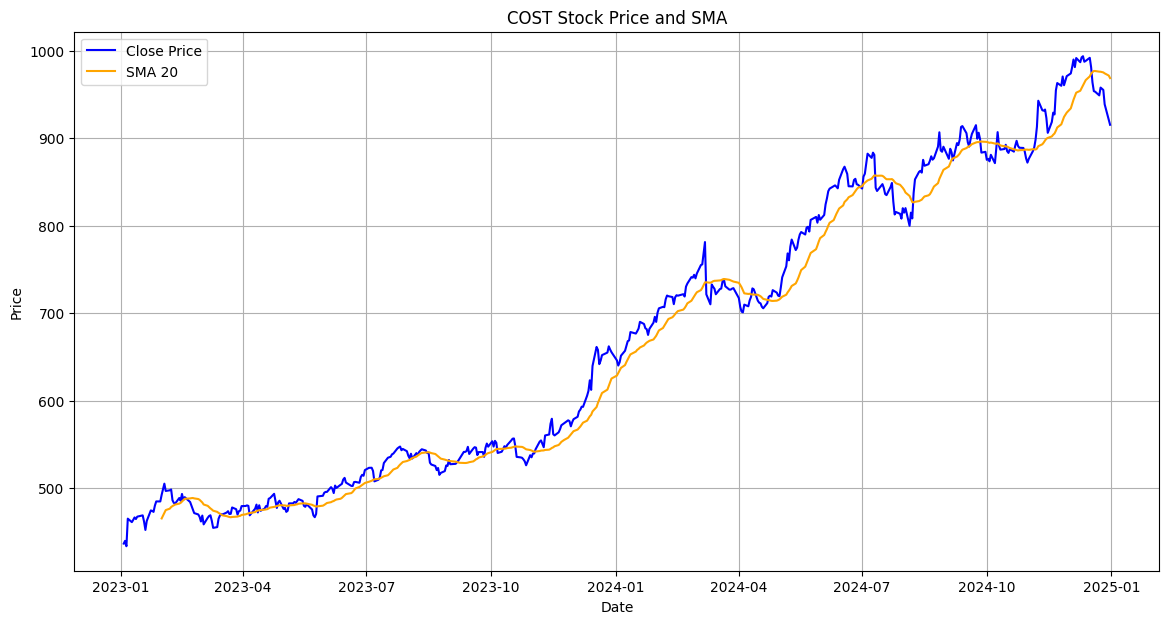

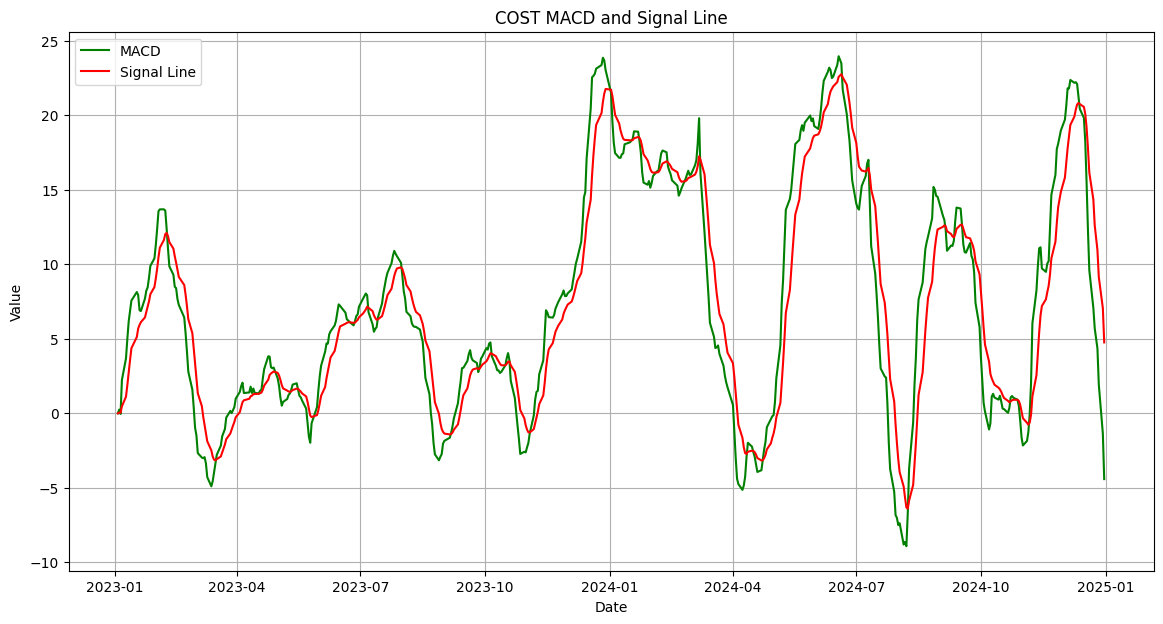

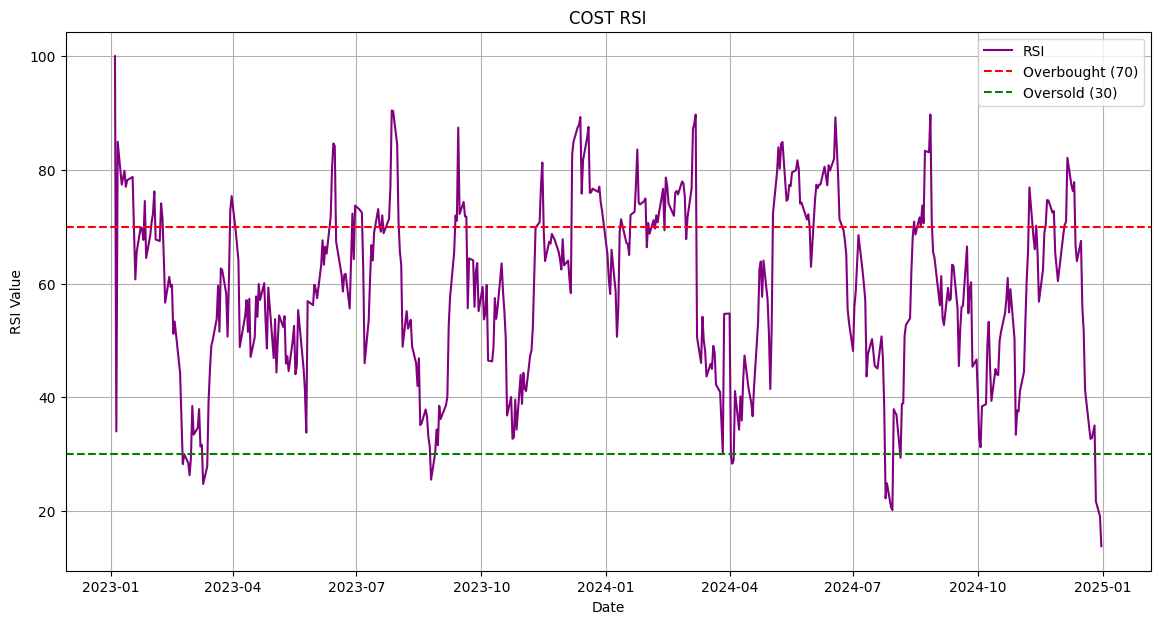

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Insights for COST:
The stock's RSI is 13.79, the MACD is -4.41, and the Signal Line is 4.76. Based on these indicators, provide a detailed financial analysis and recommendation.


In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Fetch stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Analyze a single stock and generate insights
def analyze_stock(ticker, start_date, end_date, llm):
    # Fetch stock data
    data = fetch_stock_data(ticker, start_date, end_date)

    # Calculate technical indicators
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    # Plot stock price and indicators
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['SMA_20'], label='SMA 20', color='orange')
    plt.title(f'{ticker} Stock Price and SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(data['MACD'], label='MACD', color='green')
    plt.plot(data['Signal_Line'], label='Signal Line', color='red')
    plt.title(f'{ticker} MACD and Signal Line')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

    # Display RSI
    plt.figure(figsize=(14, 7))
    plt.plot(data['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{ticker} RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.grid()
    plt.show()

    # Use Hugging Face LLM to generate insights
    rsi_value = data['RSI'].iloc[-1]
    macd_value = data['MACD'].iloc[-1]
    signal_value = data['Signal_Line'].iloc[-1]

    # Generate insights
    prompt = (
        f"The stock's RSI is {rsi_value:.2f}, the MACD is {macd_value:.2f}, and the Signal Line is {signal_value:.2f}. "
        "Based on these indicators, provide a detailed financial analysis and recommendation for this stock."
    )
    insights = llm(prompt, max_length=50, truncation=True)
    generated_text = insights[0]['generated_text']

    # Post-process the output
    cleaned_text = generated_text.split("recommendation")[0] + "recommendation."
    print(f"\nGenerated Insights for {ticker}:")
    print(cleaned_text)

# Main function to analyze top 10 NASDAQ stocks
def analyze_top_nasdaq_stocks():
    # Top 10 NASDAQ stocks by market cap
    nasdaq_stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "META", "PEP", "AVGO", "COST"]

    # Define date range
    start_date = "2023-01-01"
    end_date = "2025-01-01"

    # Load Hugging Face model
    llm = pipeline("text-generation", model="EleutherAI/gpt-neo-2.7B")  # Use a valid Hugging Face model

    # Analyze each stock
    for ticker in nasdaq_stocks:
        print(f"\nAnalyzing {ticker}...")
        analyze_stock(ticker, start_date, end_date, llm)

# Run the analysis
if __name__ == "__main__":
    analyze_top_nasdaq_stocks()